# PM2.5 预测

In [125]:
import sys
import numpy as np
import pandas as pd
import csv

# Extract Features
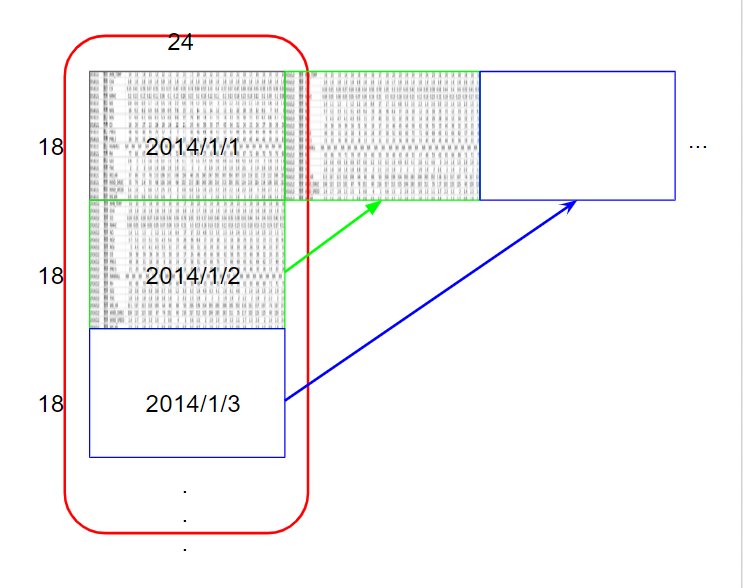
### Pseudo code
    Declare a 18-dim vector (Data)
    for i_th row in training data : 
        Data[i_th row%18].append(every element in i_th row)


In [127]:
train_set = pd.read_csv('train.csv', encoding='big5')
row_count = train_set.shape[0]
vectors = []
for i in range(18):
    vectors.append(train_set.iloc[i])
for i in range(18, row_count):
    vectors[i % 18] = pd.concat([vectors[i % 18], train_set.iloc[i]])

series_dict = {}
index = 0
for row in vectors:
    series_dict[index] = row
    index += 1
extracted_train_set = pd.DataFrame(series_dict)
extracted_train_set = extracted_train_set.T
# extracted_train_set = extracted_train_set.drop(['日期', '測站', '測項'], axis=1)
extracted_train_set = extracted_train_set.replace('NR', 0.0)
# extracted_train_set.to_csv('extracted_train.csv')

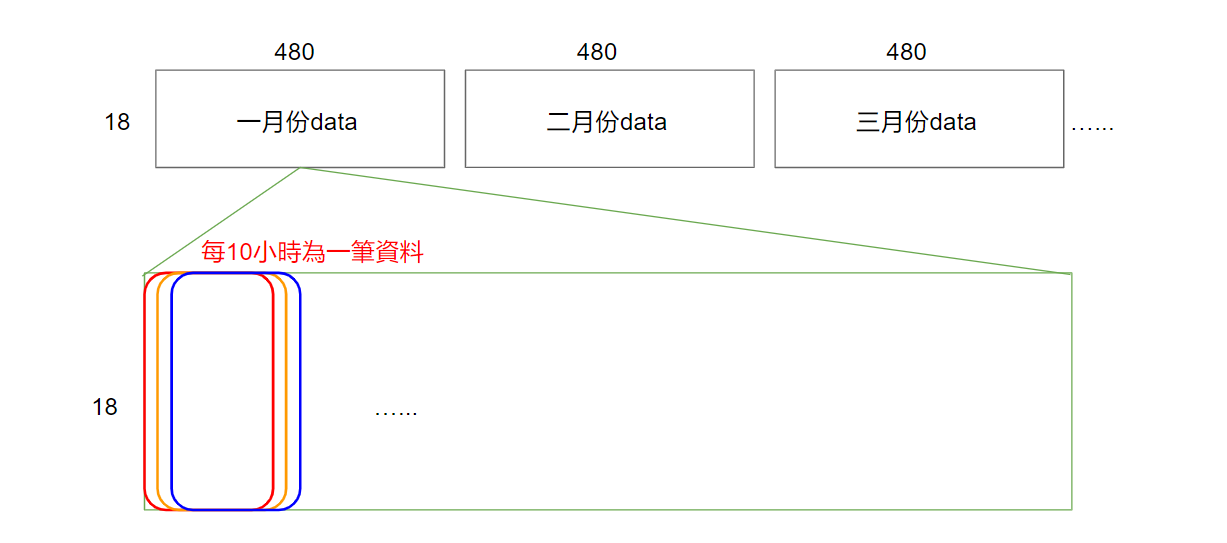
### Pseudo code
    Declare train_x for previous 9-hr data, and train_y for 10th-hr pm2.5
    for i in all the given data:
        sample every10 hrs：
            train_x.append(previous 9-hr data)
            train_y.append(the value of 10th-hr pm2.5)
    add a bias term to every data in train_x


In [133]:
list_x = []
list_y = []
i = 0
j = 0
while i < extracted_train_set.shape[1]:
    mouth_set = extracted_train_set.iloc[:, i:27 * 20 * (j + 1)]
    mouth_set = mouth_set.drop(['日期', '測站', '測項'], axis=1)
    array = np.array(mouth_set).astype(float)
    for k in range(array.shape[1]):
        if k + 9 >= array.shape[1]:
            break
        mat = array[:, k:k + 9]
        label = array[9, k + 9]
        list_x.append(mat.ravel())
        list_y.append(label)
    i += 27 * 20
    j += 1
train_x = np.array(list_x)
train_y = np.array(list_y)

In [134]:
train_x[0]

array([1.40e+01, 1.40e+01, 1.40e+01, 1.30e+01, 1.20e+01, 1.20e+01,
       1.20e+01, 1.20e+01, 1.50e+01, 1.80e+00, 1.80e+00, 1.80e+00,
       1.80e+00, 1.80e+00, 1.80e+00, 1.80e+00, 1.80e+00, 1.80e+00,
       5.10e-01, 4.10e-01, 3.90e-01, 3.70e-01, 3.50e-01, 3.00e-01,
       3.70e-01, 4.70e-01, 7.80e-01, 2.00e-01, 1.50e-01, 1.30e-01,
       1.20e-01, 1.10e-01, 6.00e-02, 1.00e-01, 1.30e-01, 2.60e-01,
       9.00e-01, 6.00e-01, 5.00e-01, 1.70e+00, 1.80e+00, 1.50e+00,
       1.90e+00, 2.20e+00, 6.60e+00, 1.60e+01, 9.20e+00, 8.20e+00,
       6.90e+00, 6.80e+00, 3.80e+00, 6.90e+00, 7.80e+00, 1.50e+01,
       1.70e+01, 9.80e+00, 8.70e+00, 8.60e+00, 8.50e+00, 5.30e+00,
       8.80e+00, 9.90e+00, 2.20e+01, 1.60e+01, 3.00e+01, 2.70e+01,
       2.30e+01, 2.40e+01, 2.80e+01, 2.40e+01, 2.20e+01, 2.10e+01,
       5.60e+01, 5.00e+01, 4.80e+01, 3.50e+01, 2.50e+01, 1.20e+01,
       4.00e+00, 2.00e+00, 1.10e+01, 2.60e+01, 3.90e+01, 3.60e+01,
       3.50e+01, 3.10e+01, 2.80e+01, 2.50e+01, 2.00e+01, 1.90e

# Implement linear regression

train_x[j].shape = (18, 9)  
w: 18 * 9  
x: 18 * 9  
y = b + w1 * x1 + w2 * x2 + ....  
y* = train_y[j]  
L = sum((y* - y) ** 2)  

Adagrad:
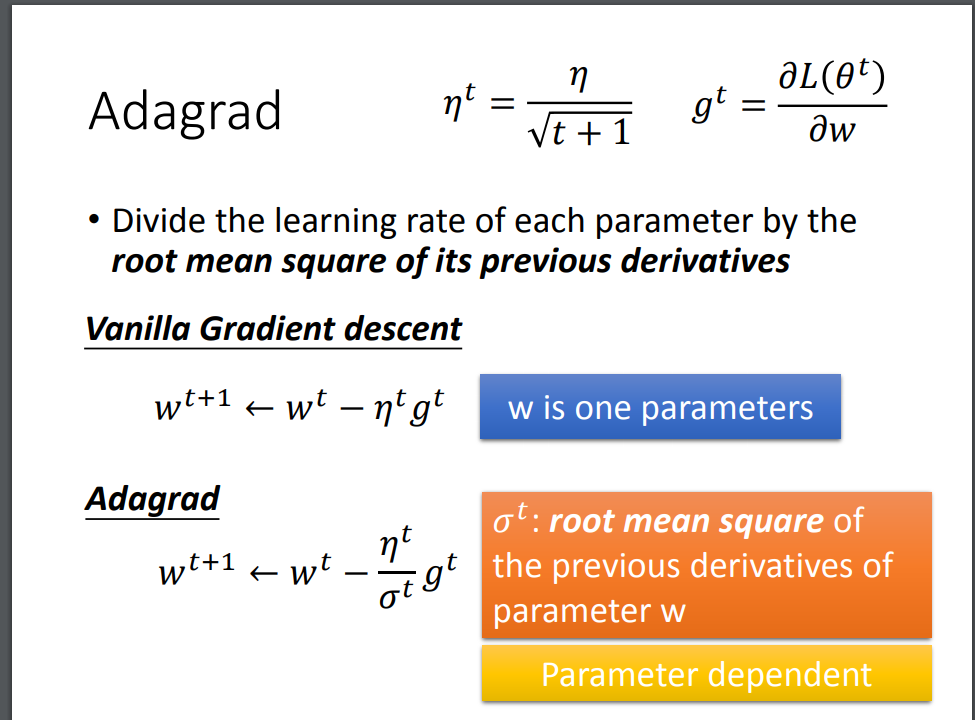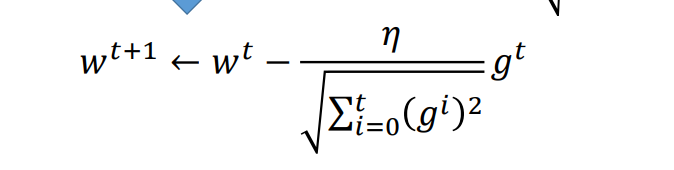
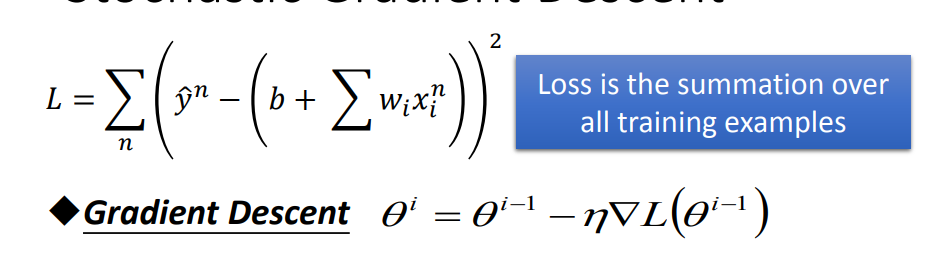

In [216]:
b = 1
w = np.zeros(18 * 9)
learning_rate = 0.0001
g_sum = np.zeros(162)
b_sum = 0
plt_x = []
plt_y = []
time = 0
import matplotlib.pyplot as plt
plt.ion()
for _ in range(2500):  
    plt.clf()
    y = []
    # 获取y向量
    for i in range(train_x.shape[0]):
        x = train_x[i]
        aaa = np.dot(w, x)
        y.append(b + np.dot(w, x))
        
    y = np.array(y)
    L = train_y - y
    # 更新每个w
    for i in range(train_x.shape[1]):
        xi = train_x[..., i]
        g = 2 * np.dot(xi, L)
        g_sum[i] += g ** 2
        w[i] += (learning_rate * g) / (g_sum[i] ** 0.5)
        if np.isnan(w[i]):
            print(xi)
            print(g)
            print(g_sum)
            print(g_sum[i])
            raise Exception
    # 更新b
    g = np.dot(np.ones(5652), L)
    b_sum += g
    b += learning_rate * g / b_sum ** 2
    
    
    plt_x.append(time)
    time += 1
    plt_y.append(L.sum())


<Figure size 432x288 with 0 Axes>

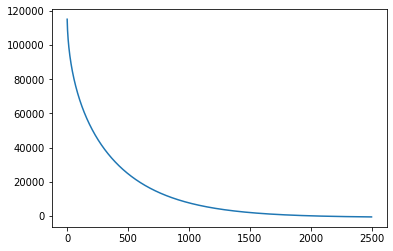

In [217]:
plt.plot(plt_x,plt_y) 
plt.show()

### 验证测试集

In [242]:
test_set = pd.read_csv('test.csv', encoding='big5', header=None, index_col=0)
test_set = test_set.replace('NR', 0.0)
test_set.shape

(4320, 10)

In [243]:
test_set.iloc[0:18]
list_test = []
for i in range(0, test_set.shape[0], 18):
    # print(test_set.iloc[i:i+18, 1:])
    month_set = test_set.iloc[i:i+18, 1:]
    array = np.array(month_set).astype(float)
    list_test.append(array)
test_x = np.array(list_test)

In [248]:
w

array([ 0.00316469,  0.00320448,  0.00325686,  0.00331466,  0.00338056,
        0.00344084,  0.00349529,  0.0035326 ,  0.0035505 ,  0.00424921,
        0.00425177,  0.00425484,  0.00425911,  0.00426813,  0.00427766,
        0.00428824,  0.00429993,  0.00430692,  0.00500418,  0.00515102,
        0.00533222,  0.00548591,  0.00567212,  0.00583036,  0.00601551,
        0.00614778,  0.00614301,  0.00478495,  0.00495373,  0.00514701,
        0.00534535,  0.00552075,  0.00565481,  0.00578227,  0.00586814,
        0.0058224 ,  0.00453149,  0.00464593,  0.00484137,  0.00497598,
        0.00514817,  0.00526725,  0.00533924,  0.00526848,  0.0049652 ,
        0.00506108,  0.00514184,  0.00527252,  0.00541873,  0.00557198,
        0.00571315,  0.00585351,  0.00597614,  0.00601118,  0.00497755,
        0.00506619,  0.00520876,  0.00535391,  0.00550854,  0.00564687,
        0.00577868,  0.00587695,  0.00586995,  0.00469038,  0.00472282,
        0.00478972,  0.00491167,  0.00508574,  0.00529263,  0.00

In [249]:
test_y = []
for i in range(test_x.shape[0]):
    x = test_x[i].flatten()
    y = b + np.dot(w, x)
    test_y.append(y)

In [257]:
test_y

[15.649992336236043,
 16.955495393201208,
 34.13213673234246,
 18.79357167606174,
 24.95176186172147,
 18.438388197327846,
 21.95892864513963,
 22.04991593362774,
 24.337723222060294,
 28.881415505294516,
 20.28851332939956,
 21.38760015091736,
 30.31983170633837,
 31.91951722909242,
 24.34914432788968,
 18.051381573987538,
 30.370837035527284,
 39.586088574914754,
 22.761248131810387,
 17.422911502359984,
 20.84402647822235,
 31.56067632703779,
 19.635320192353586,
 25.61267346763223,
 15.601634077166889,
 25.329586180395367,
 16.56237721783479,
 34.80270556796069,
 19.751103561783218,
 35.07580915720005,
 25.259229256170297,
 21.755102521280065,
 14.394046529039755,
 23.520462783390155,
 32.14733818576898,
 32.716901456103926,
 20.55011406544012,
 20.868052530557183,
 33.4132196443699,
 28.40774191085875,
 23.727459147042946,
 19.749455823814095,
 31.305642917551147,
 27.12120611213499,
 20.480965686059196,
 29.387673150255576,
 17.725577583903334,
 20.360631477652976,
 25.3614776132

### write result

In [258]:
import csv
with open('result.csv', 'w') as f:
    w = csv.writer(f)
    title = ['id', 'value']
    w.writerow(title)
    index = 0
    for y in test_y:
        content = ['id_' + str(index), test_y[index]]
        w.writerow(content)
        index += 1